### Logistic problem
### $$ \min_x \frac{1}{M} \sum_{i=1}^{M}\log[1+\exp{(-b_ia_i^\top x)}]+\frac{\mu}{2}\vert\vert x\vert\vert^2 $$
### where $a_1, a_2, \cdots, a_m\in R^n$, $b_1, b_2, \cdots, b_m\in R$ and $\gamma>0$. We notice that the Lipschitz constant $L=$  

In [64]:
# First we import some useful packages. Don't import any other package.
import numpy as np
import matplotlib.pyplot as plt
import time as clock

In [65]:
from libsvm.svmutil import *

In [66]:
#import modules
import pandas as pd
import numpy as np

#read csv to pandas dataframe
mushrooms = pd.read_csv("mushrooms.csv")

#create dummy variables
mushrooms = pd.get_dummies(mushrooms)

#subset data into dependent and independent variables x,y
LABELS = ['class_e', 'class_p']
FEATURES = [a  for a in mushrooms.columns if a not in LABELS ]
y = mushrooms[LABELS[0]]
x= mushrooms[FEATURES]

mushrooms.head()

,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,False,True,False,False,False,False,False,True,False,False,...,True,False,False,False,False,False,False,False,True,False
1,True,False,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
2,True,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,False,True,False,False,False,False,False,True,False,False,...,True,False,False,False,False,False,False,False,True,False
4,True,False,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False


In [67]:
A =x.to_numpy()

In [68]:
b = y.to_numpy()
b = b.reshape((len(b),1))

### Initialization of the model

In [69]:
mu = 0.1

In [70]:
np.random.seed(1)
x0 = 0*np.random.randn(117,1)

In [71]:
M = len(A)
#L = 2*np.trace(A@A.T)/M+ mu
L = 2*np.trace(A@A.T)/M+ mu
#L = 2*np.max(np.diag(A@A.T)) + mu
stepsize = 1/(2*L)#1/2L
H = 2
Model = {'A':A, 'b':b, 'mu':mu,'x':x0,'Lip':L,'H':2};
options= {'stepsize':stepsize}

### Algorithm

In [85]:
#Load 
from Mathtools import *
from gradNewton import *
from HBF import *
from CubicNewton import *
from CubicSR1 import *
from GradQN import *
from gd import *

In [86]:
L
Model['Lip'] = L

In [87]:
#test
maxiter = 1000#300;#500
check = 10;#10
tol = 0.0000000001;

# taping:
xs = [];
rs = [];
fs = [];
ts = [];
cols = [];
legs = [];

nams = [];

# colors for the image
COLSR1 = [(1,0,0,1), (1,0.5,0,1), (1,0,0.5,1), (0,0.5,0.5,1), (0.5,0.5,0,1) ]
COLBFGS =  [(0.3,0.7,0,1), (0.7,0.2,0.3,1), (0,0,0,1), (0.5,0,0.2,1), (0.2,0.2,0.7,1) ]

In [88]:
# turn algorithms to be run on or off
run_Cubic_Newton = 1;
run_grad_Newton = 1;
run_Cubic_SR1 = 1;

run_grad_SR1 = 1; #grad SR1 ad
run_HBF = 1
run_gd = 1
# with open('optlogis.npy', 'rb') as f:
#      opt= np.load(f)
# with open('logisSol.npy', 'rb') as f:
#      x0 = np.load(f)
np.random.seed(1)
Model['x'] = 30*np.random.randn(len(A[0,:]),1)
compute_optimal_value = False;


#TOl
tol = 1e-13
if compute_optimal_value: # optimal solution is compyted using FISTA
    maxiter = 10000;
    check = 100;
    
    run_fista = 1;
    run_grad_SR1_ad = 0; #grad SR1 ad
    run_gd = 0
    
    
    
    

In [89]:
#####################################################################
if run_Cubic_Newton:
    
    print('');
    print('********************************************************');
    print('***Cubic Newton **');
    print('***********');
    
    options = {
        'init':          x0,
        'stepsize':      stepsize,
        'storeResidual': True,
        'storePoints'  : False,
        'storeObjective':True,
        'correction':  True,
        
    }

   
    
    output = Cubic_Newton(Model, options, tol, maxiter, check);
    xs.append(output['sol']);
    rs.append(output['seq_res']);
    ts.append(output['seq_time'])
    fs.append(output['seq_fun']);
    cols.append((0.1,0.1,0.6,1));
    legs.append('Cubic Newton');
    nams.append('Cubic Newton');


********************************************************
***Cubic Newton **
***********
iter:10, funValue:3082.070544,fun:3082.070544
iter:20, funValue:2297.971261,fun:2297.971261
iter:30, funValue:1673.855195,fun:1673.855195
iter:40, funValue:1186.324061,fun:1186.324061
iter:50, funValue:813.838025,fun:813.838025
iter:60, funValue:536.770949,fun:536.770949
iter:70, funValue:337.328223,fun:337.328223
iter:80, funValue:199.522017,fun:199.522017
iter:90, funValue:109.164434,fun:109.164434
iter:100, funValue:53.841060,fun:53.841060
iter:110, funValue:22.986447,fun:22.986447
iter:120, funValue:7.965028,fun:7.965028
iter:130, funValue:2.084935,fun:2.084935
iter:140, funValue:0.552704,fun:0.552704
iter:150, funValue:0.398998,fun:0.398998
iter:160, funValue:0.397792,fun:0.397792
iter:170, funValue:0.397713,fun:0.397713
iter:180, funValue:0.397706,fun:0.397706
iter:190, funValue:0.397705,fun:0.397705
iter:200, funValue:0.397705,fun:0.397705
iter:210, funValue:0.397705,fun:0.397705
iter:220, f

In [90]:
#####################################################################
if run_grad_Newton:
    
    print('');
    print('********************************************************');
    print('***Grad Newton **');
    print('***********');
    
    options = {
        'init':          x0,
        'stepsize':      stepsize,
        'storeResidual': True,
        'storePoints'  : False,
        'storeObjective':True,
        'correction':  True,
        
    }

   
    
    output = grad_Newton(Model, options, tol, maxiter, check);
    xs.append(output['sol']);
    rs.append(output['seq_res']);
    ts.append(output['seq_time'])

    fs.append(output['seq_fun']);
    cols.append((0.1,0.1,0,1));
    legs.append('Grad Newton');
    nams.append('Grad Newton');


********************************************************
***Grad Newton **
***********
iter:10, funValue:3095.956586,fun:3095.956586
iter:20, funValue:2314.941377,fun:2314.941377
iter:30, funValue:1692.197861,fun:1692.197861
iter:40, funValue:1204.657388,fun:1204.657388
iter:50, funValue:831.093235,fun:831.093235
iter:60, funValue:552.168729,fun:552.168729
iter:70, funValue:350.362650,fun:350.362650
iter:80, funValue:209.946635,fun:209.946635
iter:90, funValue:116.972096,fun:116.972096
iter:100, funValue:59.239597,fun:59.239597
iter:110, funValue:26.348153,fun:26.348153
iter:120, funValue:9.763219,fun:9.763219
iter:130, funValue:2.830795,fun:2.830795
iter:140, funValue:0.735424,fun:0.735424
iter:150, funValue:0.408327,fun:0.408327
iter:160, funValue:0.397924,fun:0.397924
iter:170, funValue:0.397729,fun:0.397729
iter:180, funValue:0.397707,fun:0.397707
iter:190, funValue:0.397705,fun:0.397705
iter:200, funValue:0.397705,fun:0.397705
iter:210, funValue:0.397705,fun:0.397705
iter:220, fu

In [91]:
#####################################################################
if run_Cubic_SR1:
    
    print('');
    print('********************************************************');
    print('***Cubic SR1 **');
    print('***********');
    
    options = {
        'init':          x0,
        'stepsize':      stepsize,
        'storeResidual': True,
        'storePoints'  : False,
        'storeObjective':True,
        'correction':  True,
        
    }

   
    
    output = Cubic_SR1(Model, options, tol, maxiter, check);
    xs.append(output['sol']);
    rs.append(output['seq_res']);
    ts.append(output['seq_time'])

    fs.append(output['seq_fun']);
    cols.append((0.8,0.5,0.6,1));
    legs.append('Cubic SR1 PQN');
    nams.append('Cubic SR1 PQN');


********************************************************
***Cubic SR1 **
***********
iter:10, funValue:3434.315734,fun:3434.315734
iter:20, funValue:2919.182401,fun:2919.182401
iter:30, funValue:2464.265082,fun:2464.265082
iter:40, funValue:2064.670239,fun:2064.670239
iter:50, funValue:1715.728223,fun:1715.728223
iter:60, funValue:1412.970629,fun:1412.970629
iter:70, funValue:1152.139242,fun:1152.139242
iter:80, funValue:929.206957,fun:929.206957
iter:90, funValue:740.347477,fun:740.347477
iter:100, funValue:581.940080,fun:581.940080
iter:110, funValue:450.575034,fun:450.575034
iter:120, funValue:343.031392,fun:343.031392
iter:130, funValue:256.311171,fun:256.311171
iter:140, funValue:187.570687,fun:187.570687
iter:150, funValue:134.119024,fun:134.119024
iter:160, funValue:93.418554,fun:93.418554
iter:170, funValue:63.149168,fun:63.149168
iter:180, funValue:41.294221,fun:41.294221
iter:190, funValue:26.116529,fun:26.116529
iter:200, funValue:16.066109,fun:16.066109
iter:210, funValue:

In [92]:

#####################################################################
if run_grad_SR1:
    
    print('');
    print('********************************************************');
    print('***Gradient reg SR1 ***');
    print('***********');
    
    options = {
        'init':          x0,
        'stepsize':      stepsize,
        'storeResidual': True,
        'storePoints'  : False,
        'storeObjective':True,
        
    }

   
    
    output = Grad_SR1(Model, options, tol, maxiter, check);
    xs.append(output['sol']);
    rs.append(output['seq_res']);
    ts.append(output['seq_time'])

    fs.append(output['seq_fun']);
    cols.append((0.8,0.1,0,1));
    legs.append('Grad SR1 PQN');
    nams.append('Grad SR1 PQN');


********************************************************
***Gradient reg SR1 ***
***********
*****number of iterations***
1
iter:10, funValue:0.398431,fun:0.398431
iter:20, funValue:0.397705,fun:0.397705
iter:30, funValue:0.397705,fun:0.397705
Tolerence value reached
num_restart= 1


In [93]:
if run_HBF:
    
    print('');
    print('********************************************************');
    print('***Accelerated ***');
    print('***********');
    
    options = {
        'init':          x0,
        'stepsize':      stepsize,
        'storeResidual': True,
        'storePoints'  : False,
        'storeObjective':True,
        'storeTime'     : True,
        
        'storeBeta' : False,
    }

   
    
    output = HBF(Model, options, tol, maxiter, check);
    xs.append(output['sol']);
    rs.append(output['seq_res']);
    ts.append(output['seq_time']);
    
    fs.append(output['seq_obj']);
    
    cols.append((0.4,0.5,0,1));
    legs.append('HBF');
    nams.append('HBF');


********************************************************
***Accelerated ***
***********
iter:10, time:1729188293.685175, tau:1.283485,fun:55.544058
iter:20, time:1729188293.727596, tau:1.283485,fun:1.064668
iter:30, time:1729188293.763915, tau:1.283485,fun:0.404849
iter:40, time:1729188293.800769, tau:1.283485,fun:0.397775
iter:50, time:1729188293.836377, tau:1.283485,fun:0.397705
iter:60, time:1729188293.873571, tau:1.283485,fun:0.397705
iter:70, time:1729188293.908166, tau:1.283485,fun:0.397705
iter:80, time:1729188293.944067, tau:1.283485,fun:0.397705
iter:90, time:1729188293.979521, tau:1.283485,fun:0.397705
iter:100, time:1729188294.014754, tau:1.283485,fun:0.397705
iter:110, time:1729188294.048724, tau:1.283485,fun:0.397705
iter:120, time:1729188294.082693, tau:1.283485,fun:0.397705
iter:130, time:1729188294.117462, tau:1.283485,fun:0.397705
iter:140, time:1729188294.152531, tau:1.283485,fun:0.397705
iter:150, time:1729188294.202867, tau:1.283485,fun:0.397705
Tolerence value rea

In [94]:
if run_gd:
    
    print('');
    print('********************************************************');
    print('***Gradient  ***');
    print('***********');
    
    options = {
        'init':          x0,
        'stepsize':      stepsize,
        'storeResidual': True,
        'storePoints'  : False,
        'storeObjective':True,
        'storeTime'     : True,
        
        'storeBeta' : False
    }

   
    
    output = gd(Model, options, tol, maxiter, check);
    xs.append(output['sol']);
    rs.append(output['seq_res']);
    ts.append(output['seq_time'])

    fs.append(output['seq_obj']);
    cols.append((0.4,0.2,0,1));
    legs.append('GD');
    nams.append('GD');


********************************************************
***Gradient  ***
***********
iter:10, time:1729188294.256243, tau:0.238095,fun:2490.887045
iter:20, time:1729188294.290267, tau:0.238095,fun:1535.688629
iter:30, time:1729188294.324286, tau:0.238095,fun:946.247182
iter:40, time:1729188294.359449, tau:0.238095,fun:582.791241
iter:50, time:1729188294.396369, tau:0.238095,fun:358.899622
iter:60, time:1729188294.433085, tau:0.238095,fun:221.084682
iter:70, time:1729188294.469803, tau:0.238095,fun:136.301388
iter:80, time:1729188294.506947, tau:0.238095,fun:84.130513
iter:90, time:1729188294.543685, tau:0.238095,fun:52.007007
iter:100, time:1729188294.578442, tau:0.238095,fun:32.214317
iter:110, time:1729188294.614120, tau:0.238095,fun:20.011815
iter:120, time:1729188294.649208, tau:0.238095,fun:12.485815
iter:130, time:1729188294.684593, tau:0.238095,fun:7.843279
iter:140, time:1729188294.725864, tau:0.238095,fun:4.979779
iter:150, time:1729188294.762281, tau:0.238095,fun:3.214511
i

In [95]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

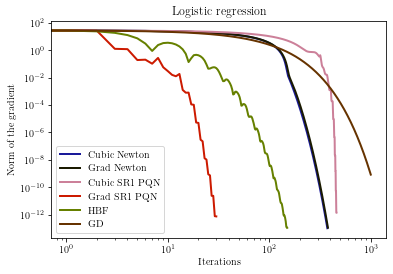

<Figure size 432x288 with 0 Axes>

In [96]:
#nalgs = len(rs);
nalgs = len(rs);

# plotting
fig1 = plt.figure();
for i in range(0,nalgs):
    iterations = np.arange(0,len(rs[i])-1,1)

    plt.plot(iterations, rs[i][0:-1], '-', color=cols[i], linewidth=2);
    #plt.plot(iterations,fs[i][1:-1], '-', color=cols[i], linewidth=2);

plt.legend(legs);
plt.yscale('log');
plt.xscale('log');

#plt.xlabel('seq_time')
plt.xlabel('Iterations')
plt.ylabel('Norm of the gradient');
plt.title('Logistic regression')
plt.savefig('AllAlgorithmLogisticPQNOct16.pdf')

plt.show();
plt.draw();


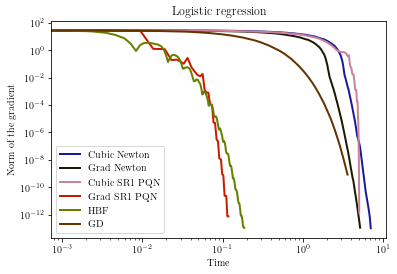

<Figure size 432x288 with 0 Axes>

In [97]:
#nalgs = len(rs);
nalgs = len(rs);
# plotting
fig1 = plt.figure();
for i in range(0,nalgs):
    plt.plot(ts[i][0:-1], rs[i][0:-1], '-', color=cols[i], linewidth=2);
    #plt.plot(iterations,fs[i][1:-1], '-', color=cols[i], linewidth=2);

plt.legend(legs);
plt.yscale('log');
plt.xscale('log');

plt.xlabel('Time')
# plt.xlabel('seq_iter')
plt.ylabel('Norm of the gradient');
plt.title('Logistic regression')
plt.savefig('AllAlgorithmLogisticPQNtimeOct16.pdf')

plt.show();
plt.draw();